In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [24]:
dataset = pd.read_csv(r"C:\Users\Pegah Khazaie\Desktop\data.csv")

In [25]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [26]:
dataset['diagnosis']=np.where(dataset['diagnosis']=='M',1,0)

In [27]:
X=dataset.iloc[:, 2:-1].values
y=dataset.iloc[:, 1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [30]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [31]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=30,hidden1=100,hidden2=100,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [32]:
torch.manual_seed(20)
model=ANN_Model()

In [33]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [34]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 9.763959884643555
Epoch number: 11 and the loss : 0.6903238296508789
Epoch number: 21 and the loss : 0.6612697839736938
Epoch number: 31 and the loss : 0.6522195339202881
Epoch number: 41 and the loss : 0.6221505999565125
Epoch number: 51 and the loss : 0.579852819442749
Epoch number: 61 and the loss : 0.4745166599750519
Epoch number: 71 and the loss : 0.4125520586967468
Epoch number: 81 and the loss : 0.3567558526992798
Epoch number: 91 and the loss : 0.3340703845024109
Epoch number: 101 and the loss : 0.3147895038127899
Epoch number: 111 and the loss : 0.29732099175453186
Epoch number: 121 and the loss : 0.28260618448257446
Epoch number: 131 and the loss : 0.27026310563087463
Epoch number: 141 and the loss : 0.2593381702899933
Epoch number: 151 and the loss : 0.24954786896705627
Epoch number: 161 and the loss : 0.2403946816921234
Epoch number: 171 and the loss : 0.23224489390850067
Epoch number: 181 and the loss : 0.2249358594417572
Epoch number: 191 an

Text(0.5, 0, 'Epoch')

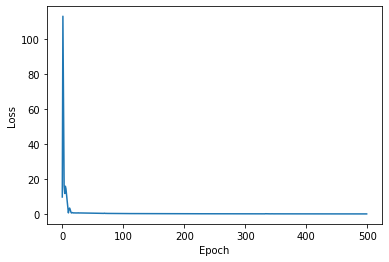

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [36]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
1
1
0
0
1
0
0
0
0
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
0
1
0
0
0
1
1
0
1
0
0
0
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
0
1
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0


In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[66,  1],
       [ 3, 44]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.9649122807017544